# Comparing the performance of a Genetic Algorithm against a Population of Hillclimbers
---

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random

## Problem Specification

**Knapsack problem**

Given a set of items, each with weight and value, determine the number of each item to include in a collection(knapsack), so that the total weight is less than or equal to the given limit and the total value is maximized as much as possible.

In [2]:
MAX_WEIGHT = 100
N_ITEMS = 50

np.random.seed(0)
values = np.random.randint(0, 10, N_ITEMS)
weights = np.random.randint(0, 10, N_ITEMS)
print(f'Values: {values}')
print(f'Weights: {weights}')

Values: [5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3
 7 0 1 9 9 0 4 7 3 2 7 2 0]
Weights: [0 4 5 5 6 8 4 1 4 9 8 1 1 7 9 9 3 6 7 2 0 3 5 9 4 4 6 4 4 3 4 4 8 4 3 7 5
 5 0 1 5 9 3 0 5 0 1 2 4 2]


In [3]:
N_INDIVIDUALS = 20
N_GENES = N_ITEMS

In [4]:
def generate_population(n_individuals, n_genes, all_zeros=False):
    '''
    create a population of hillclimbers
    :param n_individuals: number of individuals in a population
    :param n_genes: number of genes each individual has
    :param all_zeros: if true population will contain zero values only
    '''
    if all_zeros:
      P = np.random.choice([0], (n_individuals, n_genes))
    else:
      P = np.random.choice([0,1], (n_individuals, n_genes))
    return P

In [5]:
# Fitness function
def fitness_function(genotype, values=values, weights=weights, max_weight=MAX_WEIGHT):
    '''
    quantifies how close the phenotype is to the ideal solution. 
    if the weight exceeds the maximum allowable weight, the fitness returned is 0
    :param genotype: a single binary genotype
    :param values: a given set of item values
    :param weights: a given set of item weights
    :param max_volume: max allowable weight
    :returns: fitness of a genotype if it doesn't exceed the max weight, 0 otherwise
    '''
    phenotype = [(values[i],weights[i]) for i in range(len(genotype)) if genotype[i]==1]
    total_value = sum([v for v,w in phenotype])
    total_weight = sum([w for v,w in phenotype])

    if total_weight < max_weight: 
      fitness = total_value 
    else: 
      fitness = 0

    return fitness # a single number saying how good the genotype is


In [6]:
# Mutation function
def mutate(genotype, rate=0.3):
    '''
    mutate genotype with a given mutation rate
    :param genotype: a single binary genotype
    :param rate: mutation rate
    :return: mutated genotype if new fitness is better, original genotype otherwise
    '''
    mutated = np.copy(genotype)
  
    for g in range(len(genotype)):
        i = np.random.random_sample(1) # generate a random number between 0 and 1
        if i <= rate: # mutate with a certain mutation rate
            mutated[g] = 0 if mutated[g] == 1 else 1
  
    # evaluate fitness
    if fitness_function(mutated) > fitness_function(genotype):
      genotype = mutated
  
    return genotype

In [7]:
print(f'Values: {values}')
print(f'Weights: {weights}')

P = generate_population(N_INDIVIDUALS, N_GENES)
g = P[0]

print(f'Genotype: {g}')
print(fitness_function(g))

Values: [5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3
 7 0 1 9 9 0 4 7 3 2 7 2 0]
Weights: [0 4 5 5 6 8 4 1 4 9 8 1 1 7 9 9 3 6 7 2 0 3 5 9 4 4 6 4 4 3 4 4 8 4 3 7 5
 5 0 1 5 9 3 0 5 0 1 2 4 2]
Genotype: [0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0]
0


## Population of Hillclimbers

In [8]:
def run_hillclimbers(p, n_generations=100, include_plot=False):
    '''
    run a population of hillclimbers and plot their fitnesses of 
    :param: n_generations number of generations
    :param include_plot: drawing a plot
    :return: fitnesses for the best genotype
    '''
    fitnesses = np.empty((p.shape[0],n_generations), dtype=np.int64)

    for j in range(n_generations):
        for i,g in enumerate(p):
            new_g = mutate(g)
            p[i] = new_g
            fitnesses[i][j] = fitness_function(new_g)

    # Plot fitnesses
    if include_plot:
        plt.xlabel('num of generations')
        plt.ylabel('fitness')
        for i in fitnesses:
            plt.plot(i)

    # Choose the individual with the best resulting fitness
    best_ind_idx = np.argmax(fitnesses[:,-1])
    best_ind = fitnesses[best_ind_idx]
    
    return best_ind

'''
# PLOT HILLCLIMBERS
plt.rcParams['figure.figsize'] = [20, 5]
best = []
for i in range(3):
    P = generate_population(N_INDIVIDUALS, N_GENES)
    plt.subplot(1,3,i+1)
    b = run_hillclimbers(P)
    best.append(b)
plt.savefig("hillclimbers.png")
plt.show()

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(f'Best individual P{i+1}')
    plt.xlabel('num of generations')
    plt.ylabel('fitness')
    plt.plot(best[i])
plt.savefig("hillclimbers_best.png")
plt.show()
'''

'\n# PLOT HILLCLIMBERS\nplt.rcParams[\'figure.figsize\'] = [20, 5]\nbest = []\nfor i in range(3):\n    P = generate_population(N_INDIVIDUALS, N_GENES)\n    plt.subplot(1,3,i+1)\n    b = run_hillclimbers(P)\n    best.append(b)\nplt.savefig("hillclimbers.png")\nplt.show()\n\nfor i in range(3):\n    plt.subplot(1,3,i+1)\n    plt.title(f\'Best individual P{i+1}\')\n    plt.xlabel(\'num of generations\')\n    plt.ylabel(\'fitness\')\n    plt.plot(best[i])\nplt.savefig("hillclimbers_best.png")\nplt.show()\n'

137


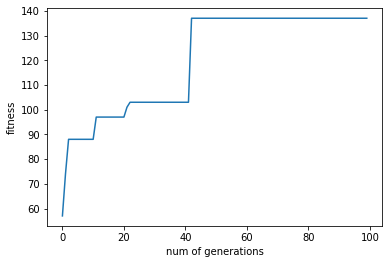

In [9]:
P = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
plt.xlabel('num of generations')
plt.ylabel('fitness')
res = run_hillclimbers(P,100)
print(res[-1])
plt.plot(res)
plt.show()

## Genetic Algorithm

In [10]:
def crossover(g1, g2, rate=0.5):
  '''
  crossover two genotypes with a given crossover rate
  :param g1: first genotype
  :param g2: second genotype
  :param rate: crossover rate
  :return: the result of crossover
  '''

  for g in range(len(g1)):
    i = np.random.random_sample(1) # generate a random number between 0 and 1
    if i <= rate: # mutate with a certain mutation rate
      g2[g] = g1[g]

  return g2

In [11]:
def tournament_selection(p, n_tournaments=100, k=3):
    '''
    perform tournament selection on a population of genotypes
    :param p: population of genotypes
    :param n_tournaments: the number of tournaments
    :param k: local neighbourhood
    :return: 
    '''
    y = np.empty(n_tournaments)

    for j in range(n_tournaments):
      # Evaluate fitnesses
      fitnesses = [fitness_function(g) for g in p] 
      best_fit = sorted(fitnesses, reverse=True)[0]
      # Choose the individual with the best fitness
      y[j] = best_fit

      # Get two individuals from the population in the local neighbourhood
      i1 = np.random.randint(0,len(p)-k)
      i2 = np.random.randint(i1+1,i1+k)

      # Compare individuals
      i1_fitness = fitness_function(p[i1])
      i2_fitness = fitness_function(p[i2])
      if i1_fitness > i2_fitness:
        winner = p[i1]
        loser  = p[i2]
        # Crossover
        c = crossover(winner, loser)
        # Mutate
        m = mutate(c)
        p[i2] = m

      else:
        winner = p[i2]
        loser  = p[i1]
        # Crossover
        c = crossover(winner, loser)
        # Mutate
        m = mutate(c)
        p[i1] = m

    return y

125.0


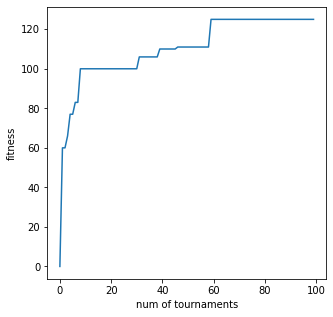

In [12]:
plt.rcParams['figure.figsize'] = [5, 5]
P = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
plt.xlabel('num of tournaments')
plt.ylabel('fitness')
res = tournament_selection(P,100)
print(res[-1])
plt.plot(res)
plt.savefig("GA.png")
plt.show() 

## Evaluation

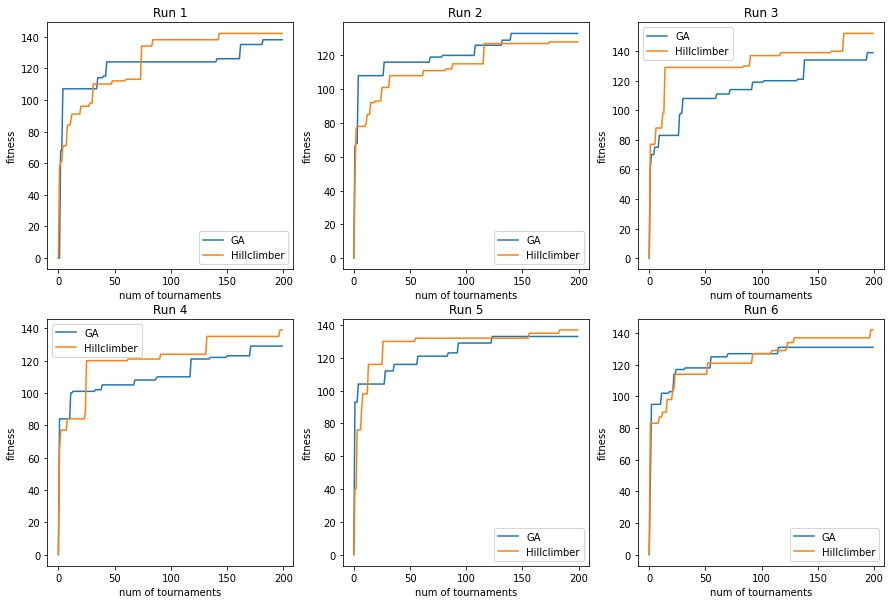

In [16]:
plt.rcParams['figure.figsize'] = [15, 10]
for i in range(6):
    P_1 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
    ga_res = tournament_selection(P_1,200)

    P_2 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
    hc_res = tournament_selection(P_2,200)
    
    plt.subplot(2,3,i+1)
    plt.title(f'Run {i+1}')
    plt.xlabel('num of tournaments')
    plt.ylabel('fitness')
    plt.plot(ga_res, label='GA')
    plt.plot(hc_res, label='Hillclimber')
    plt.legend()

plt.savefig("ga_vs_hc.png", bbox_inches = 'tight')
plt.show()

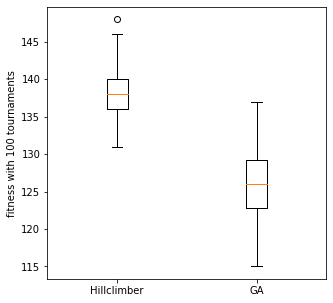

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
# Evaluate fitnesses over 100 runs and 100 tournaments
hc_results = []
ga_results = []
for i in range(50):
    # Evaluate hillclimbers
    P_1 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
    hc_res = run_hillclimbers(P_1,100)
    hc_results.append(hc_res[-1])
    # Evaluate GA's
    P_2 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
    ga_res = tournament_selection(P_2,100)
    ga_results.append(ga_res[-1])

plt.rcParams['figure.figsize'] = [5, 5]
fig, axs = plt.subplots()
axs.set_xticklabels(['Hillclimber', 'GA'])
axs.set_ylabel('fitness with 100 tournaments')
axs.boxplot((hc_results,ga_results))
plt.show()
fig.savefig("boxplot1.png")

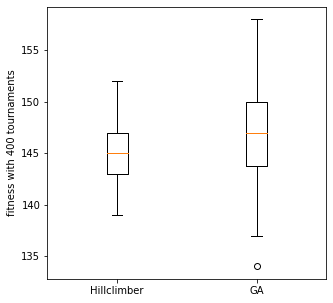

In [ ]:
# Evaluate fitnesses over 100 runs and 400 tournaments
hc_results = []
ga_results = []
for i in range(50):
    # Evaluate hillclimbers
    P_1 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
    hc_res = run_hillclimbers(P_1,400)
    hc_results.append(hc_res[-1])
    # Evaluate GA's
    P_2 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
    ga_res = tournament_selection(P_2,400)
    ga_results.append(ga_res[-1])

plt.rcParams['figure.figsize'] = [5, 5]
fig, axs = plt.subplots()
axs.set_xticklabels(['Hillclimber', 'GA'])
axs.set_ylabel('fitness with 400 tournaments')
axs.boxplot((hc_results,ga_results))
plt.show()
fig.savefig("boxplot2.png")

In [ ]:
num_iter = [100,200,300,400]

for j in num_iter:
    hc_results = []
    ga_results = []
    for i in range(10):
        # Evaluate hillclimbers
        P_1 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
        hc_res = run_hillclimbers(P_1,j)
        hc_results.append(hc_res[-1])
        # Evaluate GA's
        P_2 = generate_population(N_INDIVIDUALS, N_GENES, all_zeros=True)
        ga_res = tournament_selection(P_2,j)
        ga_results.append(ga_res[-1])

    print('Hillclimber mean after {} iterations: {}'.format(j, np.mean(hc_results))) 
    print('GA mean after {} iterations: {}'.format(j, np.mean(ga_results))) 
    print('Hillclimber std after {} iterations: {}'.format(j, np.std(hc_results))) 
    print('GA std after {} iterations: {}'.format(j, np.std(ga_results))) 
    print('---------------------------')  

Hillclimber mean after 100 iterations: 138.9
GA mean after 100 iterations: 123.2
Hillclimber std after 100 iterations: 3.448187929913334
GA std after 100 iterations: 4.093897898091744
---------------------------
Hillclimber mean after 200 iterations: 142.7
GA mean after 200 iterations: 137.6
Hillclimber std after 200 iterations: 2.5317977802344322
GA std after 200 iterations: 4.758150901348127
---------------------------
Hillclimber mean after 300 iterations: 145.1
GA mean after 300 iterations: 143.2
Hillclimber std after 300 iterations: 2.3853720883753127
GA std after 300 iterations: 4.995998398718719
---------------------------
Hillclimber mean after 400 iterations: 145.7
GA mean after 400 iterations: 150.1
Hillclimber std after 400 iterations: 2.6095976701399777
GA std after 400 iterations: 3.3600595232822883
---------------------------
